### Project 3

Refer to the project writeup [here](https://rutgers.app.box.com/s/k5jsawk0jwsprkcha0z2n2tli3pv53l7)


In [29]:
#first create a sample training image. Then worry about how to classify it
#can we use the same training set from task 1 for task 2, provided it's classified correctly

import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd
import openpyxl

In [30]:
class diagram:
    def __init__(self, data):
        self.data = data #this will be a 20x20 matrix

    @classmethod
    def createDiagram(cls):
        dgrm = cls(np.zeros((20,20), dtype=float))
        return dgrm
    
    def layWires(self):
        possibleRows = [i for i in range(self.data.shape[0])] 
        possibleColumns = [i for i in range(self.data.shape[1])]

        colors = [1,2,3,4] #1 is red, 2 is blue, 3 is yellow, 4 is green
        layRowFirst = random.randrange(2) #0 indicates false, 1 indicates true
        dangerous = 0 #boolean to keep track of whether the diagram is dangerous. #0 means not dangerous, 1 meeans it is dangerous
        thirdWireLaid = 0 #this will hold the color of the 3rd wire laid down
        for i in range(4):
            color = colors.pop(random.randrange(len(colors)))
            
            #if the wire to be laid is yellow and the red wire is already laid, mark diagram as dangerous
            if color == 3 and (1 not in colors): dangerous = 1
            
            if i==2: thirdWireLaid = color
            if i%2 == 0:
                if layRowFirst == 1:
                    row = possibleRows.pop(random.randrange(len(possibleRows)))
                    for j in range(self.data.shape[0]): self.data[row][j] = color
                else:
                    col = possibleColumns.pop(random.randrange(len(possibleColumns)))
                    for j in range(self.data.shape[1]): self.data[j][col] = color
            else:
                if layRowFirst == 1:
                    col = possibleColumns.pop(random.randrange(len(possibleColumns)))
                    for j in range(self.data.shape[1]): self.data[j][col] = color
                else:
                    row = possibleRows.pop(random.randrange(len(possibleRows)))
                    for j in range(self.data.shape[0]): self.data[row][j] = color
        
        return (dangerous,0) if dangerous == 0 else (dangerous,thirdWireLaid)


    def showDiagram(self):
        colors = ['white', 'red', 'blue', 'yellow','green']
        custom_map = ListedColormap(colors)
        bounds = [-.1, .5, 1.5, 2.5, 3.5, 4.5]
        norm = BoundaryNorm(bounds, custom_map.N)
        plt.imshow(self.data, cmap = custom_map, norm=norm)
        
        #Ensure shows plot with increments of 1
        plt.xticks(np.arange(-0.5, self.data.shape[1], 1), labels=[])
        plt.yticks(np.arange(-0.5, self.data.shape[0], 1), labels=[])

        #Show gridlines 
        plt.grid(True)

        #Show colorbar
        plt.colorbar()
        plt.show()

(0, 0)


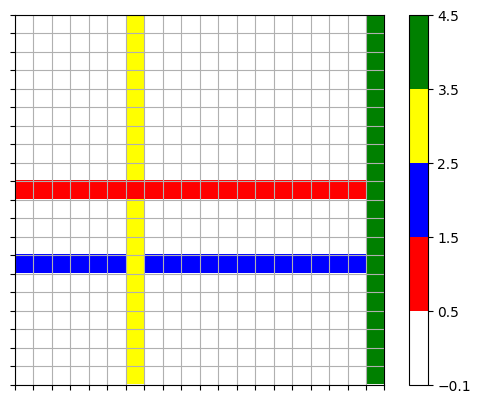

In [31]:
dgrm = diagram.createDiagram()
danger = dgrm.layWires()
print(danger)
dgrm.showDiagram()

#writing data to spreadsheet
matrix = dgrm.data #matrix of colors representing the diagram
flattened = (matrix).flatten()
arr_elem = np.array([danger[0]])
flattened = np.concatenate((arr_elem,flattened), axis=0)
df = pd.DataFrame(flattened)
df.to_excel("Task 1 Training Data.xlsx", index=False)